# Exploratory Data Analysis

In this notebook we will explore the dataset, aggregate statistics for fighters and generate ideas for what we would like to include in our dashboard

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('Data/UFC_dataset_clean.csv', index_col=0)
df.head()

,red_fighter,blue_fighter,red_kd,blue_kd,red_ss_pct,blue_ss_pct,red_td_pct,blue_td_pct,red_sub_att,blue_sub_att,...,blue_clinch_att,blue_clinch_landed,red_grnd_att,red_grnd_landed,blue_grnd_att,blue_grnd_landed,fight_time,title_bout,date,location
0,Jack Hermansson,Sean Strickland,0,0,0.38,0.46,0.00,0.00,0,0,...,2,2,0,0,0,0,1500,0,05-2022-02,"Las Vegas, Nevada, USA"
1,Punahele Soriano,Nick Maximov,0,0,0.71,0.64,0.00,0.68,0,1,...,10,10,23,23,4,4,900,0,05-2022-02,"Las Vegas, Nevada, USA"
2,Shavkat Rakhmonov,Carlston Harris,1,0,0.46,0.37,0.33,0.00,0,0,...,2,2,8,4,0,0,250,0,05-2022-02,"Las Vegas, Nevada, USA"
3,Sam Alvey,Brendan Allen,0,1,0.42,0.66,0.00,0.00,0,1,...,3,2,0,0,4,2,430,0,05-2022-02,"Las Vegas, Nevada, USA"
4,Tresean Gore,Bryan Battle,0,0,0.60,0.58,0.66,0.12,1,0,...,8,7,4,4,0,0,900,0,05-2022-02,"Las Vegas, Nevada, USA"


In [3]:
b = {}
r = {}

for col in df.columns:
    if 'blue' in col:
        b[col] = col.replace('blue_', '')
        r[col] = col.replace('blue_', 'opp_')
    elif 'red' in col:
        b[col] = col.replace('red_','opp_')
        r[col] = col.replace('red_', '')
        
r

{'red_fighter': 'fighter',
 'blue_fighter': 'opp_fighter',
 'red_kd': 'kd',
 'blue_kd': 'opp_kd',
 'red_ss_pct': 'ss_pct',
 'blue_ss_pct': 'opp_ss_pct',
 'red_td_pct': 'td_pct',
 'blue_td_pct': 'opp_td_pct',
 'red_sub_att': 'sub_att',
 'blue_sub_att': 'opp_sub_att',
 'red_rev': 'rev',
 'blue_rev': 'opp_rev',
 'red_ctrl_time': 'ctrl_time',
 'blue_ctrl_time': 'opp_ctrl_time',
 'red_ss_att': 'ss_att',
 'red_ss_landed': 'ss_landed',
 'blue_ss_att': 'opp_ss_att',
 'blue_ss_landed': 'opp_ss_landed',
 'red_ts_att': 'ts_att',
 'red_ts_landed': 'ts_landed',
 'blue_ts_att': 'opp_ts_att',
 'blue_ts_landed': 'opp_ts_landed',
 'red_td_att': 'td_att',
 'red_td_landed': 'td_landed',
 'blue_td_att': 'opp_td_att',
 'blue_td_landed': 'opp_td_landed',
 'red_head_att': 'head_att',
 'red_head_landed': 'head_landed',
 'blue_head_att': 'opp_head_att',
 'blue_head_landed': 'opp_head_landed',
 'red_body_att': 'body_att',
 'red_body_landed': 'body_landed',
 'blue_body_att': 'opp_body_att',
 'blue_body_landed': 

# Developing a class to automate various data processing tasks

Focus Areas:


*   Create dataframes that put us in a position to build an accurate fighter profile
*   Represent fighter data to make comparisons intuitive



Current capabilities


*   Ability to access historical fight data based on given fighter

Features to integrate:


*   Function to aggregate data across UFC career
*   Calculate target areas (leg, body, head) both per fight and for career
*   Create pretty table to visualize historical events (Must be user interpretable)






In [87]:
class Dataset():
    def __init__(self):
        data = pd.read_csv('Data/UFC_dataset_clean.csv')
        data['date'] = pd.to_datetime(data['date'], format="%d-%Y-%m")
        data = data.set_index(data['date'])
        data = data.rename({"Unnamed: 0":"fight_id"}, axis=1)
        
        self.data = data
        self.fight_info = self.get_fight_info()
        self.fight_stats = self.get_fight_stats()
        self.career_data = self.get_career_data()
        
    def get_fight_info(self):
        columns = ['fight_id', 'red_fighter', 'blue_fighter', 'weight_class', 'result', 'method', 
                   'round', 'fight_time', 'event_title', 'location']
        return self.data.loc[:, columns]
    
    def get_fight_stats(self):
        red_columns = ['red_fighter', 'red_kd', 'red_td_att', 'red_td_landed', 'red_rev', 
                       'red_ctrl_time', 'red_sub_att', 'red_ss_att', 'red_ss_landed', 
                       'red_ts_att', 'red_ts_landed', 'red_head_att', 'red_head_landed',
                       'red_body_att', 'red_body_landed', 'red_leg_att', 'red_leg_landed',
                       'red_clinch_att', 'red_clinch_landed', 'red_dist_att', 'red_dist_landed',
                       'red_grnd_att', 'red_grnd_landed', 'fight_time', 'title_bout']
        
        blue_columns = ['blue_fighter', 'blue_kd', 'blue_td_att', 'blue_td_landed', 'blue_rev', 
                        'blue_ctrl_time', 'blue_sub_att', 'blue_ss_att', 'blue_ss_landed', 
                        'blue_ts_att', 'blue_ts_landed', 'blue_head_att', 'blue_head_landed',
                        'blue_body_att', 'blue_body_landed', 'blue_leg_att', 'blue_leg_landed',
                        'blue_clinch_att', 'blue_clinch_landed', 'blue_dist_att', 'blue_dist_landed',
                        'blue_grnd_att', 'blue_grnd_landed', 'fight_time', 'title_bout']
        
        red_data = og_data.loc[:,red_columns]
        blue_data = og_data.loc[:,blue_columns]
        
        red_cols = {}
        blue_cols = {}
        
        for idx in range(len(blue_columns)):
            blue = blue_columns[idx]
            red = red_columns[idx]
            
            blue_cols[blue] = blue.replace('blue_', '')
            red_cols[red] = red.replace('red_', '')
            
        blue_data = blue_data.rename(blue_cols, axis=1)
        red_data = red_data.rename(red_cols, axis=1)
        
        fighter_stats = pd.concat([blue_data, red_data])
        
        fighter_stats['fight_time'] = fighter_stats['fight_time']/60
        return fighter_stats
    
    def get_career_data(self):
        
        career_data = self.fight_stats
        career_data['fight'] = 1
        career_data = career_data.groupby('fighter').sum()
        
        # Strike accuracy
        career_data['takedown_pct'] = career_data['td_landed']/career_data['td_att']
        career_data['sig_strike_pct'] = career_data['ss_landed']/career_data['ss_att']
        career_data['tot_strike_pct'] = career_data['ts_landed']/career_data['ts_att']
        career_data['head_strike_pct'] = career_data['head_landed']/career_data['head_att']
        career_data['body_strike_pct'] = career_data['body_landed']/career_data['body_att']
        career_data['leg_strike_pct'] = career_data['leg_landed']/career_data['leg_att']
        career_data['clinch_strike_pct'] = career_data['clinch_landed']/career_data['clinch_att']
        career_data['dist_strike_pct'] = career_data['dist_landed']/career_data['dist_att']
        career_data['ground_strike_pct'] = career_data['grnd_landed']/career_data['grnd_att']
        
        # Activity
        career_data['sig_strikes_att_per_min'] = career_data['ss_att']/career_data['fight_time']
        career_data['sig_strikes_landed_per_min'] = career_data['ss_landed']/career_data['fight_time']
        career_data['tot_strikes_att_per_min'] = career_data['ts_att']/career_data['fight_time']
        career_data['tot_strikes_landed_per_min'] = career_data['ts_landed']/career_data['fight_time']
        
        return career_data

* Takedown percentage
* Significant Strike percentage
* Total Strike precentage
* Head Strike percentage
* Body Strike percentage
* Leg Strike percentage
* Clinch Strike percentage
* Distance Strike percentage
* Ground Strike percentage


In [90]:
test.columns

Index(['kd', 'td_att', 'td_landed', 'rev', 'ctrl_time', 'sub_att', 'ss_att',
       'ss_landed', 'ts_att', 'ts_landed', 'head_att', 'head_landed',
       'body_att', 'body_landed', 'leg_att', 'leg_landed', 'clinch_att',
       'clinch_landed', 'dist_att', 'dist_landed', 'grnd_att', 'grnd_landed',
       'fight_time', 'title_bout', 'fight', 'takedown_pct', 'sig_strike_pct',
       'tot_strike_pct', 'head_strike_pct', 'body_strike_pct',
       'leg_strike_pct', 'clinch_strike_pct', 'dist_strike_pct',
       'ground_strike_pct', 'sig_strikes_att_per_min',
       'sig_strikes_landed_per_min', 'tot_strikes_att_per_min',
       'tot_strikes_landed_per_min'],
      dtype='object')

In [109]:
fd = Dataset()

test = fd.career_data

test_more_than_10 = test.loc[(test['fight']>10)&(test['kd']>2)]

annotations = list(test_more_than_10.index)

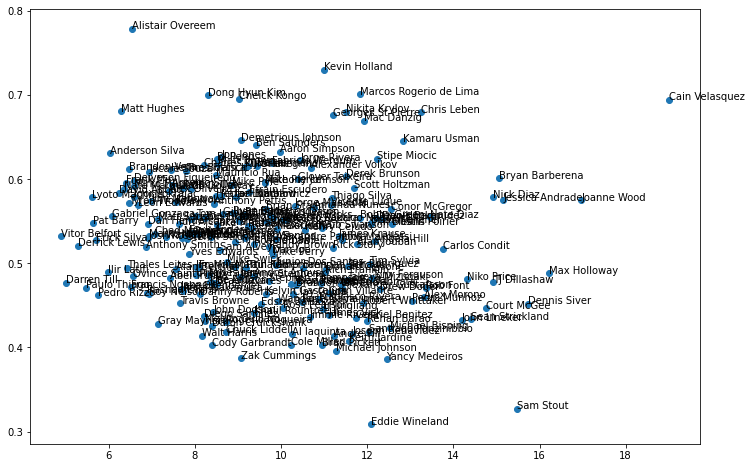

In [110]:
X = 'tot_strikes_att_per_min'
Y = 'tot_strike_pct'

test_sig_strikes = test_more_than_10.loc[:, [X, Y]]

plt.figure(figsize=(12,8))
plt.scatter(x=test_sig_strikes[X],y=test_sig_strikes[Y])

for i, label in enumerate(annotations):
    plt.text(test_sig_strikes[X][i], test_sig_strikes[Y][i],label)
    
plt.show()

In [67]:
red_columns = ['red_fighter', 'red_kd', 'red_td_att', 'red_td_landed', 'red_rev', 
                'red_ctrl_time', 'red_sub_att', 'red_ss_att', 'red_ss_landed', 
               'red_ts_att', 'red_ts_landed', 'red_head_att', 'red_head_landed',
               'red_body_att', 'red_body_landed', 'red_leg_att', 'red_leg_landed',
               'red_clinch_att', 'red_clinch_landed', 'red_dist_att', 'red_dist_landed',
               'red_grnd_att', 'red_grnd_landed', 'fight_time', 'title_bout']
blue_columns = ['blue_fighter', 'blue_kd', 'blue_td_att', 'blue_td_landed', 'blue_rev', 
                'blue_ctrl_time', 'blue_sub_att', 'blue_ss_att', 'blue_ss_landed', 
               'blue_ts_att', 'blue_ts_landed', 'blue_head_att', 'blue_head_landed',
               'blue_body_att', 'blue_body_landed', 'blue_leg_att', 'blue_leg_landed',
               'blue_clinch_att', 'blue_clinch_landed', 'blue_dist_att', 'blue_dist_landed',
               'blue_grnd_att', 'blue_grnd_landed', 'fight_time', 'title_bout']
red_data = og_data.loc[:,red_columns]
blue_data = og_data.loc[:,blue_columns]

red_cols = {}
blue_cols = {}

for col in red_data:
    red_cols[col] = col.replace('red_', '')
    
for col in blue_data:
    blue_cols[col] = col.replace('blue_', '')
    
blue_data = blue_data.rename(blue_cols, axis=1)
red_data = red_data.rename(red_cols, axis=1)

fighter_stats = pd.concat([blue_data, red_data])

In [68]:
fighter_stats

,fighter,kd,td_att,td_landed,rev,ctrl_time,sub_att,ss_att,ss_landed,ts_att,...,leg_att,leg_landed,clinch_att,clinch_landed,dist_att,dist_landed,grnd_att,grnd_landed,fight_time,title_bout
date,,,,,,,,,,,,,,,,,,,,,
2022-02-05,Sean Strickland,0,0,0,0,0,0,330,153,338,...,4,4,2,2,328,151,0,0,1500,0
2022-02-05,Nick Maximov,0,16,11,1,525,1,45,29,82,...,4,4,10,10,31,15,4,4,900,0
2022-02-05,Carlston Harris,0,0,0,0,44,0,27,10,35,...,4,1,2,2,25,8,0,0,250,0
2022-02-05,Brendan Allen,1,1,0,0,44,1,54,36,54,...,7,7,3,2,47,32,4,2,430,0
2022-02-05,Bryan Battle,0,8,1,0,200,0,193,112,203,...,17,17,8,7,185,105,0,0,900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-03-11,Orlando Wiet,0,0,0,0,0,0,12,8,15,...,0,0,0,0,3,1,9,7,170,0
1994-03-11,Frank Hamaker,0,1,1,1,0,3,3,2,15,...,0,0,0,0,1,1,2,1,292,0
1994-03-11,Johnny Rhodes,0,1,1,0,0,0,17,11,86,...,1,1,1,1,1,1,15,9,733,0


In [42]:
og_data = Dataset().data

og_data.loc[:,['fight_id', 'red_fighter', 'blue_fighter', 'weight_class', 'result', 'method', 'round', 'fight_time', 'event_title', 'location']]

,fight_id,red_fighter,blue_fighter,weight_class,result,method,round,fight_time,event_title,location
date,,,,,,,,,,
2022-02-05,0,Jack Hermansson,Sean Strickland,Middleweight,Sean Strickland,Decision,5,1500,UFC Fight Night,"Las Vegas, Nevada, USA"
2022-02-05,1,Punahele Soriano,Nick Maximov,Middleweight,Nick Maximov,Decision,3,900,UFC Fight Night,"Las Vegas, Nevada, USA"
2022-02-05,2,Shavkat Rakhmonov,Carlston Harris,Welterweight,Shavkat Rakhmonov,KO/TKO,1,250,UFC Fight Night,"Las Vegas, Nevada, USA"
2022-02-05,3,Sam Alvey,Brendan Allen,Light Heavyweight,Brendan Allen,Submission,2,430,UFC Fight Night,"Las Vegas, Nevada, USA"
2022-02-05,4,Tresean Gore,Bryan Battle,Middleweight,Bryan Battle,Decision,3,900,UFC Fight Night,"Las Vegas, Nevada, USA"
...,...,...,...,...,...,...,...,...,...,...
1994-03-11,6434,Orlando Wiet,Robert Lucarelli,Open Weight,Orlando Wiet,KO/TKO,1,170,UFC 2,"Denver, Colorado, USA"
1994-03-11,6435,Frank Hamaker,Thaddeus Luster,Open Weight,Frank Hamaker,Submission,1,292,UFC 2,"Denver, Colorado, USA"
1994-03-11,6436,Johnny Rhodes,David Levicki,Open Weight,Johnny Rhodes,KO/TKO,1,733,UFC 2,"Denver, Colorado, USA"


In [58]:
# Continue to build class to store individual fighter data

class Fighter_Data():
    ''' 
    Currently extracts each unique fighter in the database and stores individual fighter data
    for each fight, stored in a dataframe. 
    '''
    def __init__(self, name):
        data = pd.read_csv('Data/UFC_dataset_clean.csv')
        data['date'] = pd.to_datetime(data['date'], format="%d-%Y-%m")
        data = data.set_index(data['date'])
        data = data.drop(data.columns[0], axis=1)

        self.name = name
        self.data = data
        self.fighter_list = list(set(list(set(self.data.red_fighter)) + list((set(self.data.blue_fighter)))))
        #print(len(self.fighter_list))
        if self.name not in self.fighter_list:
            raise Exception(f"{self.name} is not a fighter listed in the database")

        self.fight_data = self.get_fight_data()
        self.fighter_career_stats = self.career_data()
      
    def get_fight_data(self):
        mask = (self.data['red_fighter'] == self.name) | (self.data['blue_fighter'] == self.name)
        columns = ['event_title', 'date', 'location', 'title_bout', 'weight_class', 'result', 'method', 'fight_time',
                   'round']
        fighter = self.data[mask]

        # Create masks to filter fighter data
        #blue_cols = [col for col in self.data.columns if 'blue' in col] + columns + ['red_fighter']
        #red_cols = [col for col in self.data.columns if 'red' in col] + columns + ['blue_fighter']
        
        blue_cols = {}
        red_cols = {}

        for col in df.columns:
            if 'blue' in col:
                blue_cols[col] = col.replace('blue_', '')
                red_cols[col] = col.replace('blue_', 'opp_')
            elif 'red' in col:
                blue_cols[col] = col.replace('red_','opp_')
                red_cols[col] = col.replace('red_', '')
        
        #red_to_none = {col: col.replace('red_', '') for col in self.data.columns}
        #red_to_none['blue_fighter'] = 'opponent'

        #blue_to_none = {col: col.replace('blue_', '') for col in self.data.columns else col: col.replace('red_')}
        #blue_to_none['red_fighter'] = 'opponent'

        blue_mask = (fighter['blue_fighter'] == self.name)
        red_mask = (fighter['red_fighter'] == self.name)

        fighter_blue = fighter.loc[blue_mask, :].rename(blue_cols, axis=1)
        fighter_red = fighter.loc[red_mask, ].rename(red_cols, axis=1)

        fighter_df = pd.concat([fighter_blue, fighter_red]).sort_index()

        fighter_df['Win'] = np.where(fighter_df['result'] == self.name, 1, 0)
        fighter_df['Draw'] = np.where(fighter_df.result == 'D', 1, 0)
        fighter_df['Loss'] = np.where(fighter_df.result != self.name, 1, 0)

        return fighter_df
    
    def career_data(self):
        strikes = ['kd', 'ss_landed', 'ts_landed', 'head_landed', 'body_landed', 'leg_landed',
                   'dist_landed', 'clinch_landed', 'grnd_landed', 'rev', 'td_landed', 'ctrl_time', 'fight_time',
                   'Win', 'Draw', 'Loss']
        cumulative = self.fight_data.loc[:, strikes].aggregate('sum')
        return cumulative

In [59]:
dom = Fighter_Data('Jamahal Hill')

In [61]:
dom.fight_data

,opp_fighter,fighter,opp_kd,kd,opp_ss_pct,ss_pct,opp_td_pct,td_pct,opp_sub_att,sub_att,...,opp_grnd_landed,grnd_att,grnd_landed,fight_time,title_bout,date,location,Win,Draw,Loss
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,Darko Stosic,Jamahal Hill,0,0,0.43,0.43,0.66,0.0,0,0,...,6,0,0,900,0,2020-01-25,"Raleigh, North Carolina, USA",1,0,0
2020-05-30,Klidson Abreu,Jamahal Hill,0,2,0.71,0.58,0.00,0.0,0,0,...,0,4,3,111,0,2020-05-30,"Las Vegas, Nevada, USA",0,0,1
2020-12-05,Ovince Saint Preux,Jamahal Hill,0,0,0.50,0.53,0.00,0.0,0,0,...,0,0,0,517,0,2020-12-05,"Las Vegas, Nevada, USA",1,0,0
2021-06-12,Paul Craig,Jamahal Hill,0,0,0.92,0.12,0.00,0.0,3,0,...,17,0,0,119,0,2021-06-12,"Glendale, Arizona, USA",0,0,1
2021-12-04,Jimmy Crute,Jamahal Hill,0,1,0.50,0.40,0.00,0.0,0,0,...,0,1,1,48,0,2021-12-04,"Las Vegas, Nevada, USA",1,0,0


In [29]:
dom.career_data()

kd                  3
ss_landed         188
ts_landed         191
head_landed        99
body_landed        69
leg_landed         20
dist_landed       174
clinch_landed      10
grnd_landed         4
rev                 0
td_landed           0
ctrl_time          73
fight_time       1695
Win                 3
Draw                0
Loss                2
dtype: int64

In [8]:
data.opp_ss_pct

date
2020-01-25    0.43
2020-05-30    0.71
2020-12-05    0.50
2021-06-12    0.92
2021-12-04    0.50
Name: opp_ss_pct, dtype: float64

In [9]:
x = [f'{data.result[i]} via {data.method[i]}\n{data.event_title[i]}\n{data.date[i]}' for i in range(len(data))]

In [18]:
def get_headline(data, i):
    if data.Win[i] == 1:
        headline = f'{data.event_title[i]}\nWin v. {data.opp_fighter[i].split(" ")[1]}'
    if data.Draw[i] == 1:
        headline = f'{data.event_title[i]}\nDraw v. {data.opp_fighter[i].split(" ")[1]}'
    if data.Loss[i] == 1:
        headline = f'{data.event_title[i]}\nLoss v. {data.opp_fighter[i].split(" ")[1]}'
    return headline
    
def get_dates(data, i):
    return data.date[i].date()

In [19]:
labels = [get_headline(data, i) for i in range(len(data))]

print(labels)

['UFC Fight Night\nWin v. Stosic', 'UFC Fight Night\nLoss v. Abreu', 'UFC Fight Night\nWin v. Saint', 'UFC 263\nLoss v. Craig', 'UFC Fight Night\nWin v. Crute']


In [20]:
from datetime import date 

dates = [get_dates(data, i) for i in range(len(data))]
min_date = date(np.min(dates).year - 1, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 1, np.max(dates).month, np.max(dates).day)
dates

[datetime.date(2020, 1, 25),
 datetime.date(2020, 5, 30),
 datetime.date(2020, 12, 5),
 datetime.date(2021, 6, 12),
 datetime.date(2021, 12, 4)]

In [21]:
#labels = ['{0:}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]
labels

['UFC Fight Night\nWin v. Stosic',
 'UFC Fight Night\nLoss v. Abreu',
 'UFC Fight Night\nWin v. Saint',
 'UFC 263\nLoss v. Craig',
 'UFC Fight Night\nWin v. Crute']

Text(0.5, 1.0, 'Fighter Timeline: Jamahal Hill')

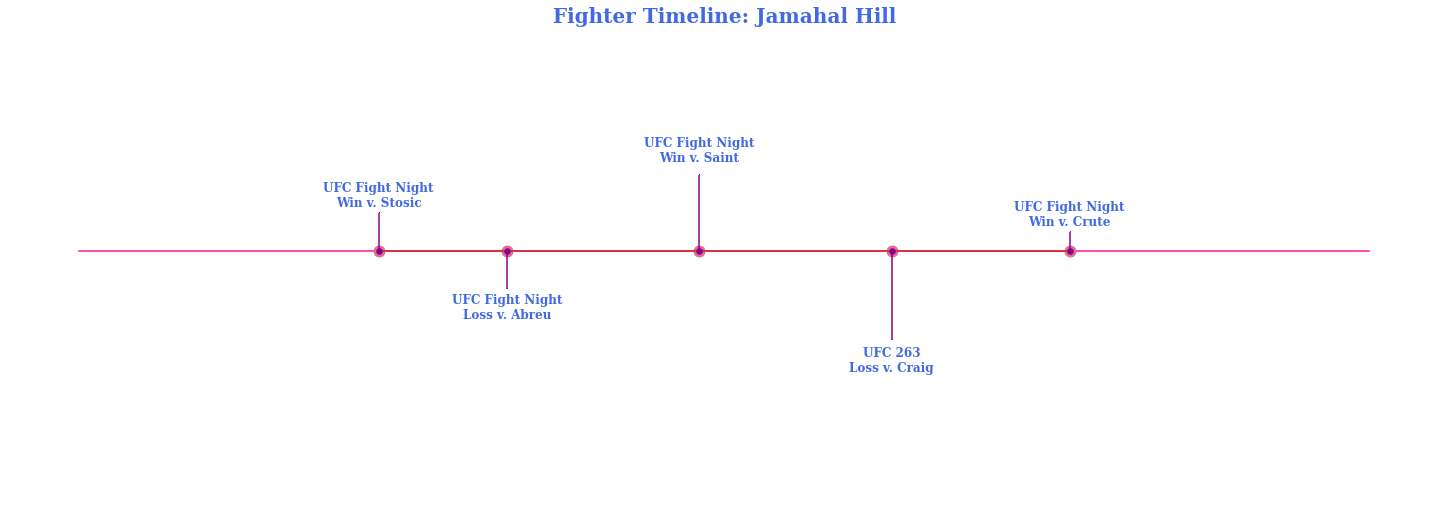

In [22]:
fig, ax = plt.subplots(figsize=(20, 7), constrained_layout=True)
_ = ax.set_ylim(-2, 1.75)
_ = ax.set_xlim(min_date, max_date)
_ = ax.axhline(0, xmin=0.05, xmax=0.95, c='deeppink', zorder=1)
 
_ = ax.scatter(dates, np.zeros(len(dates)), s=120, c='palevioletred', zorder=2)
_ = ax.scatter(dates, np.zeros(len(dates)), s=30, c='darkmagenta', zorder=3)

label_offsets = np.tile([0.35, -0.53, 0.7, -0.95, 0.2, -0.4, 0.6, -0.85], int(np.ceil(len(data)/8)))[:len(dates)]
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)

stems = np.tile([0.3, -0.3, 0.6, -0.7, 0.15, -0.15, 0.5, -0.6], int(np.ceil(len(data)/8)))[:len(dates)]
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
ax.set_title(f'Fighter Timeline: {data.fighter[0]}',fontweight="bold", fontfamily='serif', fontsize=20, 
                 color='royalblue')

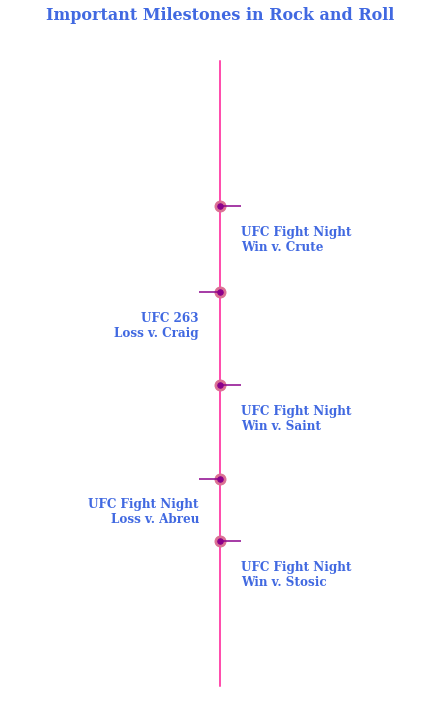

In [23]:
from datetime import timedelta

fig, ax = plt.subplots(figsize=(6, 10), constrained_layout=True)
_ = ax.set_xlim(-20, 20)
_ = ax.set_ylim(min_date, max_date)
_ = ax.axvline(0, ymin=0.05, ymax=0.95, c='deeppink', zorder=1)
 
_ = ax.scatter(np.zeros(len(dates)), dates, s=120, c='palevioletred', zorder=2)
_ = ax.scatter(np.zeros(len(dates)), dates, s=30, c='darkmagenta', zorder=3)

label_offsets = np.repeat(2.0, len(dates))
label_offsets[1::2] = -2.0
for i, (l, d) in enumerate(zip(labels, dates)):
    d = d - timedelta(days=90)
    align = 'right'
    if i % 2 == 0:
        align = 'left'
    _ = ax.text(label_offsets[i], d, l, ha=align, fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)

stems = np.repeat(2.0, len(dates))
stems[1::2] *= -1.0   
x = ax.hlines(dates, 0, stems, color='darkmagenta')

# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
    
# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])
 
_ = ax.set_title('Important Milestones in Rock and Roll', fontweight="bold", fontfamily='serif', fontsize=16, 
                 color='royalblue')

In [24]:
np.tile([0.3, -0.3, 0.6, -0.6], int(np.ceil(len(data)/4)))[:len(dates)]

array([ 0.3, -0.3,  0.6, -0.6,  0.3])

In [25]:
label_offsets = np.zeros(len(dates))
label_offsets[::2] = 0.35
label_offsets[1::2] = -0.7
for i, (l, d) in enumerate(zip(labels, dates)):
    _ = ax.text(d, label_offsets[i], l, ha='center', fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)


In [26]:
stems = np.zeros(len(dates))
stems[::2] = 0.3
stems[1::2] = -0.3   
markerline, stemline, baseline = ax.stem(dates, stems, use_line_collection=True)
_ = plt.setp(markerline, marker=',', color='darkmagenta')
_ = plt.setp(stemline, color='darkmagenta')

In [27]:
# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)
#hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])

In [28]:
conor = UFC.get_fight_data('Conor McGregor')
dustin = UFC.get_fight_data('Dustin Poirier')
bobby = UFC.get_fight_data('Bobby Green')
charles = UFC.get_fight_data('Charles Oliveira')

NameError: name 'UFC' is not defined

In [ ]:
ss_pm_conor = conor.ss_landed/conor.fight_time
ss_pm_dustin = dustin.ss_landed/dustin.fight_time
ss_pm_bobby = bobby.ss_landed/bobby.fight_time
ss_pm_charles = charles.ss_landed/charles.fight_time

plt.figure(figsize=(10,7))
plt.scatter(conor.index, ss_pm_conor, color='green', label='Conor McGregor')
plt.scatter(dustin.index, ss_pm_dustin, color='blue', label='Dustin Poirier')
plt.scatter(bobby.index, ss_pm_bobby, color='red', label='Bobby Green')
plt.scatter(charles.index, ss_pm_charles, color='gold', label='Charles Oliveira')
plt.legend()
plt.show()


In [ ]:
1/dustin.fight_time

In [ ]:
def fighter_data(data, name):

    mask = (data['red_fighter']==name) | (data['blue_fighter']==name)
    fighter = data[mask]

    # Create masks to filter fighter data
    blue_cols = [col for col in data.columns if 'blue' in col] + ['red_fighter']
    red_cols = [col for col in data.columns if 'red' in col] + ['blue_fighter']

    red_to_none = {col:col.replace('red_', '') for col in red_cols}
    red_to_none['blue_fighter'] = 'opponent'
    blue_to_none = {col:col.replace('blue_', '') for col in blue_cols}
    red_to_none['red_fighter'] = 'opponent'

    blue_mask = (fighter['blue_fighter']==name) 
    red_mask = (fighter['red_fighter']==name) 

    fighter_blue = fighter.loc[blue_mask, blue_cols].rename(blue_to_none, axis=1)
    fighter_red = fighter.loc[red_mask, red_cols].rename(red_to_none, axis=1)

    fighter_final = pd.concat([fighter_blue, fighter_red]).sort_index()
    return fighter_final

In [ ]:
conor

In [ ]:
mask = (df['red_fighter']=='Israel Adesanya') | (df['blue_fighter']=='Israel Adesanya')

izzy = df[mask]

In [ ]:
blue_cols = [col for col in izzy.columns if 'blue' in col]
red_cols = [col for col in izzy.columns if 'red' in col]

red_to_none = {col:col.replace('red_', '') for col in red_cols}
blue_to_none = {col:col.replace('blue_', '') for col in blue_cols}

In [ ]:
blue_mask = (df['blue_fighter']=='Israel Adesanya') 
red_mask = (df['red_fighter']=='Israel Adesanya')

In [ ]:
izzy_blue = izzy.loc[blue_mask, blue_cols]
izzy_red = izzy.loc[red_mask, red_cols]

izzy_blue = izzy_blue.rename(blue_to_none, axis=1)
izzy_red = izzy_red.rename(red_to_none, axis=1)

In [ ]:
pd.concat([izzy_blue, izzy_red]).sort_index()

In [ ]:
# reference: https://mentalitch.com/key-events-in-rock-and-roll-history/
dates = [date(1954, 7, 19), date(1959, 2, 3), date(1964, 2, 9), date(1965, 7, 25), date(1967, 6, 1), date(1969, 8, 15)]
min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)
 
labels = ['Elvis appears on\nthe Ed Sullivan Show', 'Buddy Holly dies', 'The Beatles appear\non the Ed Sullivan Show', 
          'Bob Dylan goes electric', 'The Beatles release\nSgt. Pepper', 'Woodstock']
# labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]